# Suicides rate analysis

## Abstract

A public dataset which gives the overview of suicide rates from year 1985 to 2016 of various countries is chosen. The dataset infers the suicides number and the various factors affecting it. The main aim is to perform linear and logistics  regresssion and to conclude how the variables are dependendt on each other. Also, to determine how the variables in the dataset are related and to improve the accuracy of the prediction using various regression models.

The dataset consists of 12 columns and 28,000 rows

The columns are:
country, year, sex, age group, count of suicides, population, suicide rate, country-year composite key, HDI for year, gdp_for_year, gdp_per_capita, generation 

The main input variables are:
1. Sex
2. Countrty
3. Year
4. Population
5. GDP_per_capita
6. GDP_per_years

Target variable:
Suicides_no

Datasource: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

#### Importing all the required libraries

In [1]:
# importing the libraries
%matplotlib inline 
import matplotlib.pyplot as plt  # Visualisation
import numpy as np               # linear algebra
import pandas as pd              # data processing, I/O
from scipy import stats          # Statistical operations
import seaborn as sns            # visualisation and tyling of graphs 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#### Loading the dataset

In [2]:
df = pd.read_csv("master.csv",decimal=',')  

#### Retrieving the first five rows of the dataset

In [3]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#### Checking the columns present in the dataset

In [4]:
df.columns.values

array(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype=object)

#### Renaming the gdp_for year and gdp_per_capita

In [5]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100kpop', 'country-year', 'HDI for year',
       'gdp_for_year_dollars', 'gdp_per_capita_dollars', 'generation']
df.columns.values

array(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicidesper100kpop', 'country-year', 'HDI for year',
       'gdp_for_year_dollars', 'gdp_per_capita_dollars', 'generation'],
      dtype=object)

#### The gdp_for_year is a numeric value. Since commas are used, it is interpreted as a string. Type casting the gdp_for_year from string to integer

In [6]:
df['gdp_for_year_dollars'] = df['gdp_for_year_dollars'].str.replace(',','').astype(int)

#### Gives information about the columns present in the dataset

In [7]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country                   27820 non-null object
year                      27820 non-null int64
sex                       27820 non-null object
age                       27820 non-null object
suicides_no               27820 non-null int64
population                27820 non-null int64
suicidesper100kpop        27820 non-null object
country-year              27820 non-null object
HDI for year              8364 non-null object
gdp_for_year_dollars      27820 non-null int64
gdp_per_capita_dollars    27820 non-null int64
generation                27820 non-null object
dtypes: int64(5), object(7)
memory usage: 2.5+ MB


#### Finding the sum of all null values present in a column and arranging them in descending order

In [8]:
df.isnull().sum().sort_values(ascending=False)

HDI for year              19456
generation                    0
gdp_per_capita_dollars        0
gdp_for_year_dollars          0
country-year                  0
suicidesper100kpop            0
population                    0
suicides_no                   0
age                           0
sex                           0
year                          0
country                       0
dtype: int64

#### Since majority of the rows for HDI for year are null, we are dropping that column for better analysis

In [9]:
df1 = df.drop(['HDI for year'],axis = 1)

#### Checking the dataset after dropping HDI_for_year

In [10]:
df1.head()

,country,year,sex,age,suicides_no,population,suicidesper100kpop,country-year,gdp_for_year_dollars,gdp_per_capita_dollars,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


#### Describes statistical analysis of the dataset and generates descriptive statistics of the dataframe

In [11]:
df1.describe()  

,year,suicides_no,population,gdp_for_year_dollars,gdp_per_capita_dollars
count,27820.000000,27820.000000,2.782000e+04,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,1.812071e+13,126352.000000


#### Finding the distribution of categorical values

In [12]:
df1.describe(include=['O'])

,country,sex,age,suicidesper100kpop,country-year,generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,5298,2321,6
top,Iceland,female,55-74 years,0,Bahamas1987,Generation X
freq,382,13910,4642,4281,12,6408


#### There are 101 unique countries There are 6 age groups There are 6 different generations The count of male suicide rate is more

### Grouping suicide_no and sex and representing it on a barplot

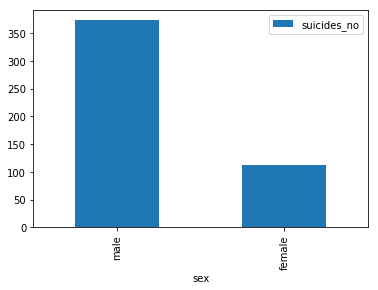

In [13]:
df1[['sex','suicides_no']].groupby(['sex']).mean().sort_values(by='suicides_no', ascending=False).plot(kind='bar')

#### We can observe that the count of suicide_no for male is more

### Plotting the bargraph of suicides_no vs age based on sex

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

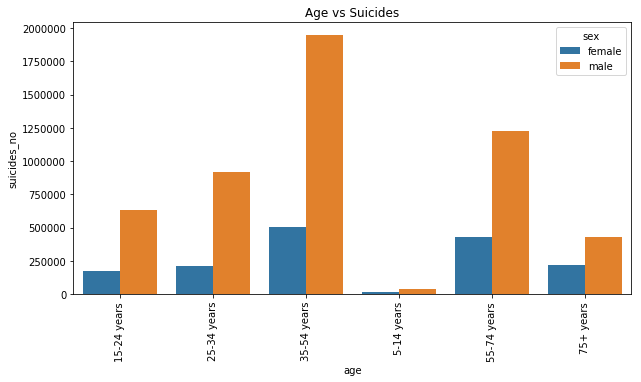

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'age', y='suicides_no', hue='sex', data=df1.groupby(["age","sex"]).sum().reset_index()).set_title('Age vs Suicides')
plt.xticks(rotation=90)

#### We can observe that the suicides_no is more for age 34-54 years and 55-74 years Suicides_no is less for age 5-14

### Plotting suicides_no vs country on a bargraph

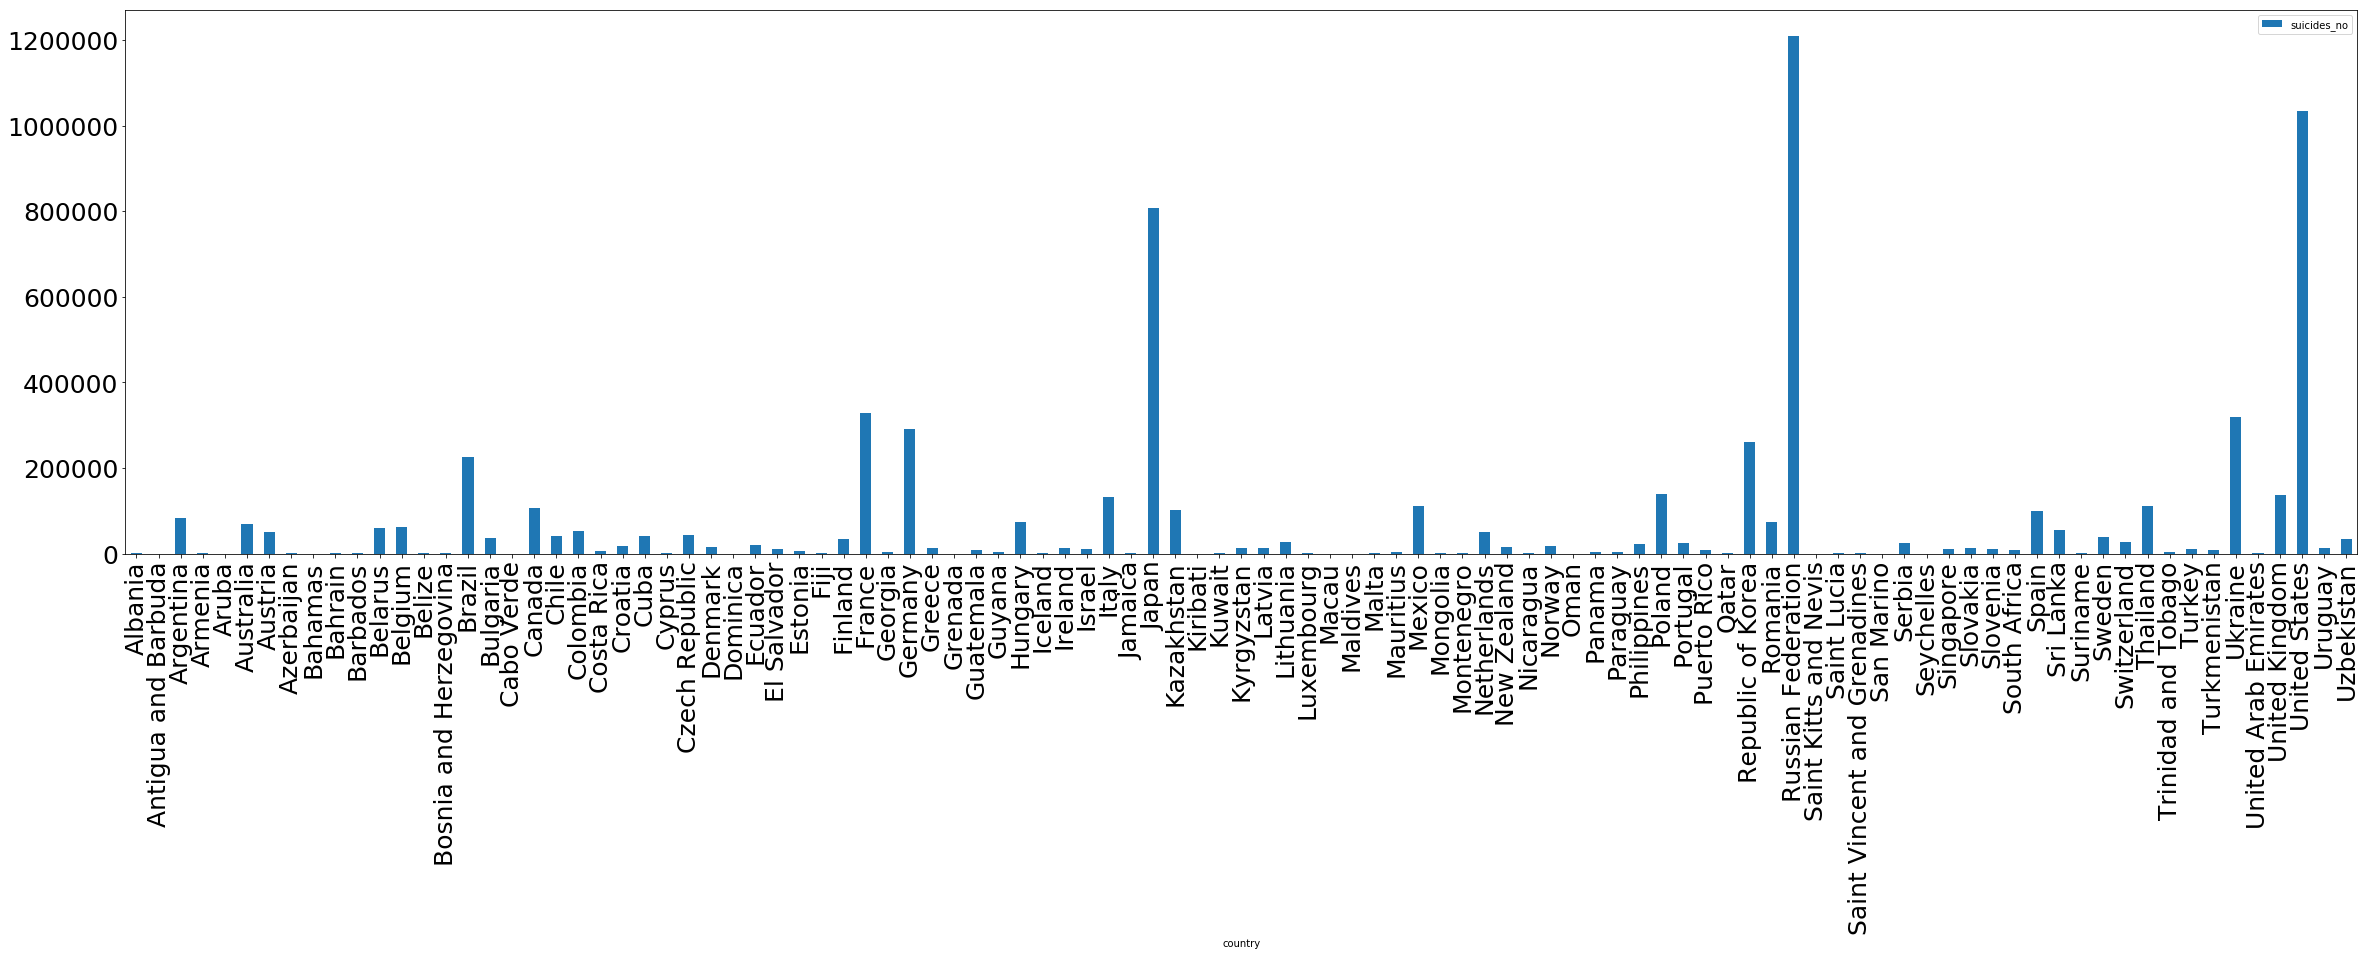

In [15]:
country_suicides = df1[['country','suicides_no']].groupby(['country']).sum()
country_suicides.plot(kind='bar', figsize=(40,10), fontsize=25)

#### Suicides_no is higher in Russian Federation, United States and Japan Suicide_no is low in many countries

### Retreiving the top 15 countries having highest suicides_no

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

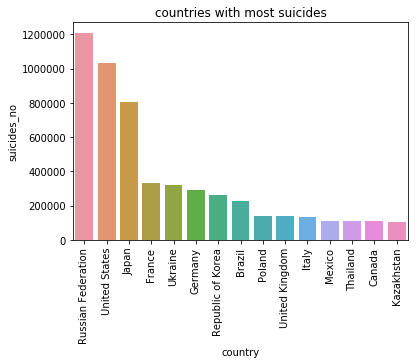

In [16]:
country_suicides = country_suicides.reset_index().sort_values(by='suicides_no', ascending=False)
top15 = country_suicides[:15]
sns.barplot(x='country', y='suicides_no', data=top15).set_title('countries with most suicides')
plt.xticks(rotation=90)

### Retreiving countries having least suicides_no

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

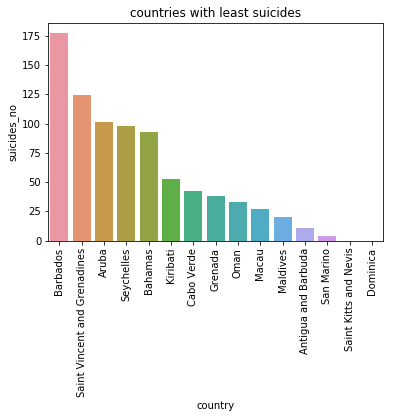

In [17]:
bottom15 = country_suicides[-15:]
sns.barplot(x='country', y='suicides_no', data=bottom15).set_title('countries with least suicides')
plt.xticks(rotation=90)

### Representing distribution of suicides_no with respect to years

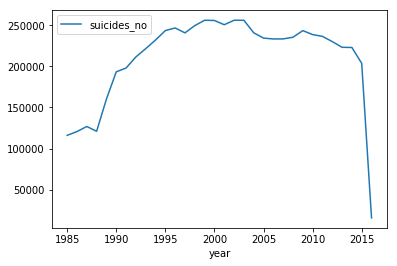

In [18]:
df1[['year','suicides_no']].groupby(['year']).sum().plot()

#### The suicides_no is highest during the years 2000-2005

### Respresenting suicide count vs generation

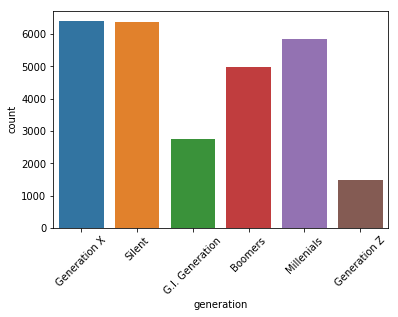

In [19]:
grid = sns.countplot(x='generation', data=df1)
grid = plt.setp(grid.get_xticklabels(), rotation=45)

#### Generation X and generation Silent have almost same suicides_no count

### Representing top 15 countries vs suicides_no based on sex

Text(0.5, 1.0, 'countries suicides rate w.r.t sex')

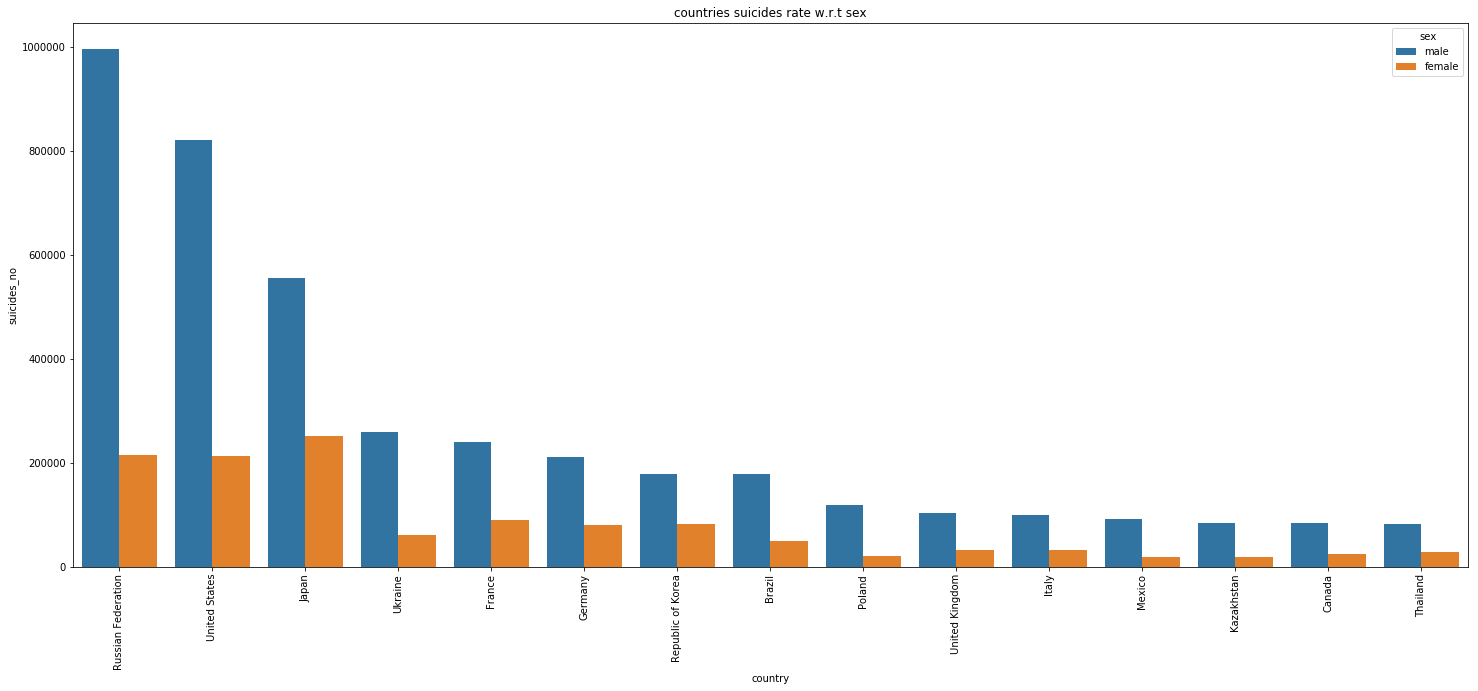

In [20]:
top15data = df1.loc[df1['country'].isin(top15.country)]
country_suicides_sex = top15data[['country','suicides_no','sex']].groupby(['country','sex']).sum().reset_index().sort_values(by='suicides_no', ascending=False)
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x='country', y='suicides_no', hue='sex', data=country_suicides_sex).set_title('countries suicides rate w.r.t sex')

### Representing least 15 countries based on sex and suicides_no

Text(0.5, 1.0, 'countries suicides rate w.r.t sex')

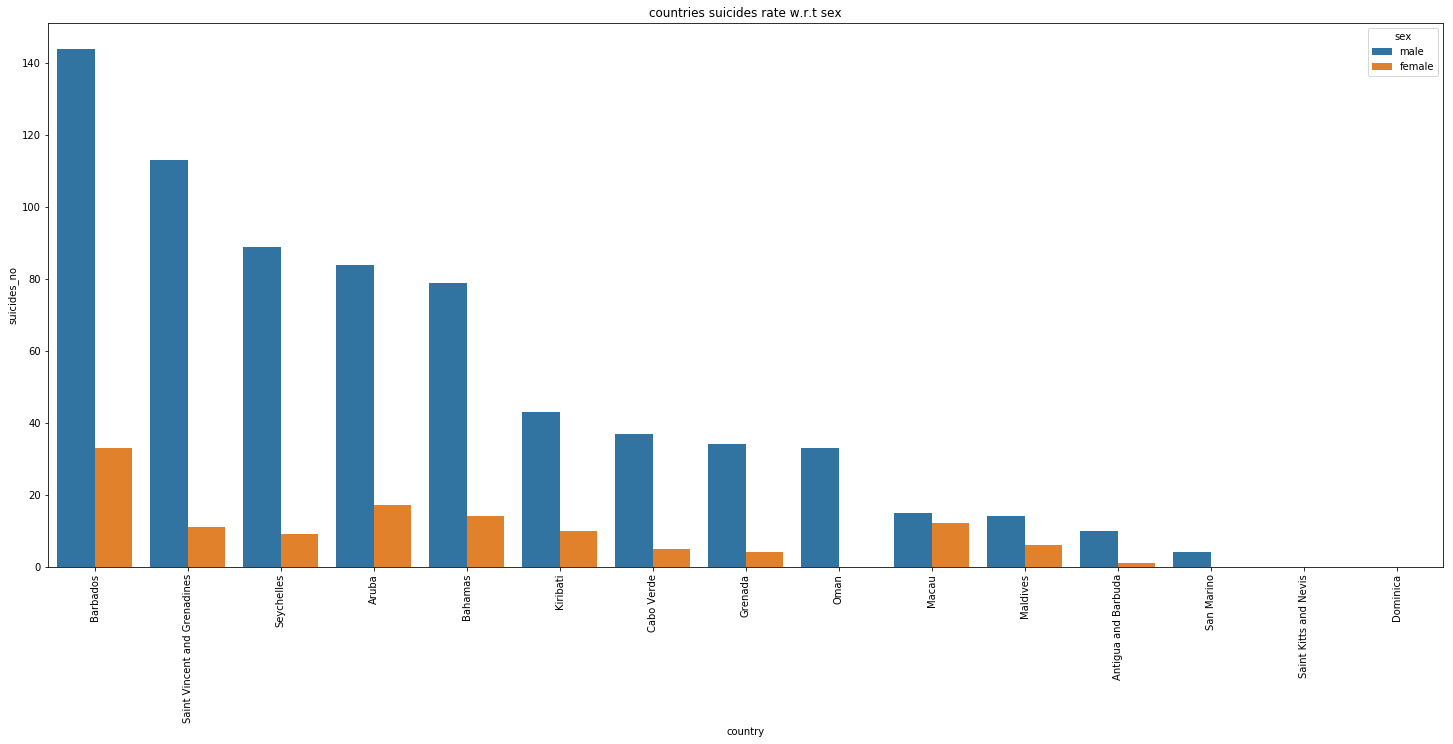

In [21]:
bottom15data = df1.loc[df1['country'].isin(bottom15.country)]
country_suicides_sex = bottom15data[['country','suicides_no','sex']].groupby(['country','sex']).sum().reset_index().sort_values(by='suicides_no', ascending=False)
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.barplot(x='country', y='suicides_no', hue='sex', data=country_suicides_sex).set_title('countries suicides rate w.r.t sex')

### Plotting highly correlated columns using heatmap:

#### A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

#### The below is a two-dimensional plot of values which are mapped to the columns of the dataset.

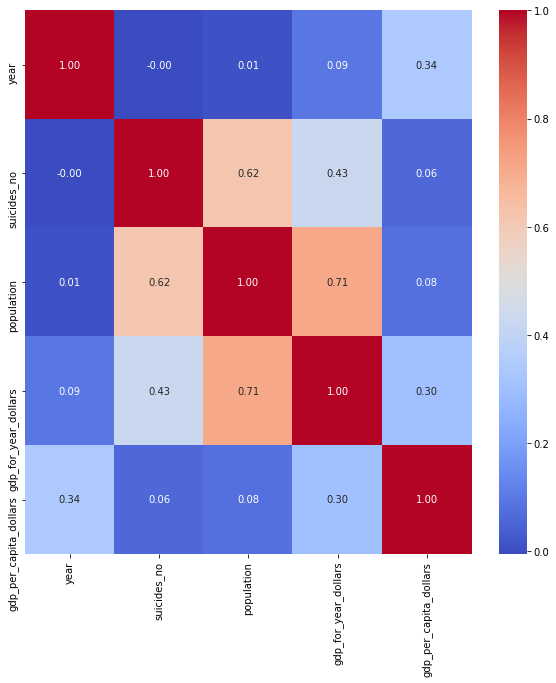

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.iloc[:,:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

#### We can infer from the heatmap that: Population and gdp_for_year are correlated Population and suicides_no is also correlated

In [23]:
import sklearn.utils
df1 = sklearn.utils.shuffle(df1)

### Pairplot of the highly correlated columns

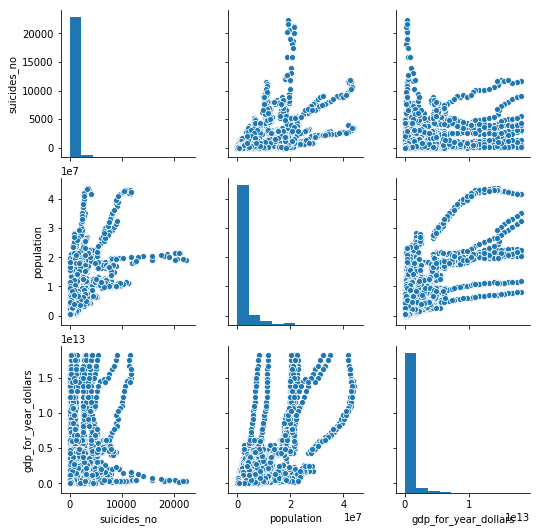

In [24]:

x = df1[['suicides_no','population','gdp_for_year_dollars']]
sns.pairplot(x)

### It can be inferred from the graph that:
#### 1. Suicides_no and population are linearly related
#### 2. Population and GDP_per_year is also positively related

#### Defining a function to categorize the age-groups

In [25]:
# function to categorize the age groups
def decade_mapping(data):
    if 1985 <= data <= 1994:
        return "1985-1994"
    elif 1995 <= data <= 2004:
        return "1995-2004"
    else:
        return "2005-2016"
    
df1.year = df1.year.apply(decade_mapping)
df1.head(3)

,country,year,sex,age,suicides_no,population,suicidesper100kpop,country-year,gdp_for_year_dollars,gdp_per_capita_dollars,generation
20709,Romania,1995-2004,female,5-14 years,4,1567300,0.26,Romania1997,35838588170,1677,Millenials
23929,Sri Lanka,1995-2004,female,15-24 years,500,1726757,28.96,Sri Lanka1996,13897738375,834,Generation X
18081,Norway,1995-2004,female,75+ years,11,220907,4.98,Norway2003,228752436372,53533,Silent


#### Choosing the dependent and independent variables for regression models

In [37]:
cols_to_use = ['sex','population','gdp_per_capita_dollars','generation','suicidesper100kpop']
X = df1[cols_to_use]
y = df1.suicides_no

### Importing the libraries for regression model

In [50]:
get_ipython().run_line_magic('matplotlib', 'inline')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

# Linear Regression

### Model 1

#### Splitting the data into train and test sets

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [52]:
# to convert the columns values to numeric
labelencoder=LabelEncoder()
for column in df1.columns:
    df1[column] = labelencoder.fit_transform(df1[column])

#### Fitting the model and calculating the accuracy of test and train data sets.

In [53]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.377789
value of Accuracy_test:  0.383245


#### Validating the model using 5-fold cross validation and calculating the mean score of cross validation

#### k-fold Cross-validation:
In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data
The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once. 10-fold cross-validation is commonly used, but in general k remains an unfixed parameter.

In [54]:
# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

0.37630866734767965


#### The average of cross validation score is 0.377

### calucating the root mean square error and mean square log error for train and test datasets

#### Linear Regression is applied on the dataset and Root mean square error and Mean Squared log error are calculated as below:

Root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. The RMSE represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. These deviations are called residuals when the calculations are performed over the data sample that was used for estimation and are called errors (or prediction errors) when computed out-of-sample.

Mean Squared Error is a measure of how close a fitted line is to data points. It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points. RMSE is the square root of MSE.

In [55]:
train_pred_Y = model.predict(X_train)
test_pred_Y = model.predict(X_test)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
msle_train = mean_squared_log_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
msle_test = mean_squared_log_error(test_pred_Y, y_test)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 270.4315060170384 msle_train: 3.0360852967406946
rmse_test: 269.98071311645714 msle_test: 3.1017811673780673


### Calculation of metrics affecting linear regression

#### R-squared is a statistical measure that’s used to assess the goodness of fit of our regression model.

In [56]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_train)

print("value of r-squared score:%10f"% r2_score(y_train,y_pred))

value of r-squared score:  0.377789


In [57]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
regr = OLS(y_train, X_train).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            suicides_no   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     3054.
Date:                Thu, 04 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:11:07   Log-Likelihood:            -1.3823e+05
No. Observations:               19474   AIC:                         2.765e+05
Df Residuals:                   19469   BIC:                         2.765e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
sex                       82.0677      4.016     20.438      0.000      74.197      89.938
population                 0.0197      0.000     77.695      0.000       0.019       0.020
gdp_per_capita_dollars    -0.0171      0.003     -5.819      0.000      -0.023      -0.011
generation               -33.1655      1.023    -32.434      0.000     -35.170     -31.161
suicidesper100kpop         0.0119      0.001      9.844      0.000       0.010       0.014
==============================================================================
Omnibus:                    11729.809   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106365.094
Skew:                           2.851   Prob(JB):                         0.00
Kurtosis:                      12.928   Cond. No.                     2.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Summary of OLS Regression : AIC, BIC and adjusted R-squared

The AIC can be termed as a mesaure of the goodness of fit of any estimated statistical model. The BIC is a type of model selection among a class of parametric models with different numbers of parameters.

R2 shows how well terms (data points) fit a curve or line. Adjusted R2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.

### Conclusion from model 1
Is the relationship significant?
Does the model make sense? Interpret the meaning of each independent variable.
Cross-validate the model. How well did it do?

1. We can conclude that the model captures 38% accuracy which is not that good and hence model is not very significant
2. The model is quite not appreciable as it doesn't has a great accuracy.
3. The model has cross-validated and it has a accuracy of 38% and has a R-squared (0.440)


### Model 2

#### Choosing dependent and independent variables for model 2

In [58]:
 cols_to_use1 = ['sex', 'age','population',
       'gdp_per_capita_dollars']
X = df1[cols_to_use1]
y = df1.suicides_no

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [60]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.366536
value of Accuracy_test:  0.370112


In [61]:
# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

0.3653587926362366


In [62]:
train_pred_Y = model.predict(X_train)
test_pred_Y = model.predict(X_test)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
msle_train = mean_squared_log_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
msle_test = mean_squared_log_error(test_pred_Y, y_test)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 274.4948167282358 msle_train: 3.3883722912406533
rmse_test: 274.32146702754216 msle_test: 3.45127825537268


In [63]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_train)

print("value of r-squared score:%10f"% r2_score(y_train,y_pred))

value of r-squared score:  0.366536


In [64]:
regr = OLS(y_train, X_train).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            suicides_no   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     3447.
Date:                Thu, 04 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:51:22   Log-Likelihood:            -1.3866e+05
No. Observations:               19474   AIC:                         2.773e+05
Df Residuals:                   19470   BIC:                         2.774e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
sex                       78.1092      4.069     19.196      0.000      70.133      86.085
age                      -16.7838      1.064    -15.769      0.000     -18.870     -14.698
population                 0.0193      0.000     79.939      0.000       0.019       0.020
gdp_per_capita_dollars    -0.0329      0.003    -11.245      0.000      -0.039      -0.027
==============================================================================
Omnibus:                    12028.185   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           113380.967
Skew:                           2.934   Prob(JB):                         0.00
Kurtosis:                      13.262   Cond. No.                     2.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion from model 2

Is the relationship significant? Does the model make sense? Interpret the meaning of each independent variable. Cross-validate the model. How well did it do?

1. We can conclude that the model captures 37% accuracy which is not that good and hence model is not very significant
2. The model is quite not appreciable as it doesn't has a great accuracy.
3. The model has cross-validated and it has a accuracy of 37% and has a R-squared (0.415)


### Model 3

In [65]:
cols_to_use = ['population','sex']
X = df1[cols_to_use]
y = df1.suicides_no


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [67]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.354377
value of Accuracy_test:  0.359559


In [68]:
# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

0.35320090551196487


In [69]:
train_pred_Y = model.predict(X_train)
test_pred_Y = model.predict(X_test)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
msle_train = mean_squared_log_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
msle_test = mean_squared_log_error(test_pred_Y, y_test)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 277.7241022328118 msle_train: 3.342116339896279
rmse_test: 277.0731364859882 msle_test: 3.395668344181966


In [70]:
y_pred=model.predict(X_train)

print("value of r-squared score:%10f"% r2_score(y_train,y_pred))

value of r-squared score:  0.354377


In [71]:
regr = OLS(y_train, X_train).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            suicides_no   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     6406.
Date:                Thu, 04 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:53:41   Log-Likelihood:            -1.3895e+05
No. Observations:               19474   AIC:                         2.779e+05
Df Residuals:                   19472   BIC:                         2.779e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
population     0.0159      0.000     83.742      0.000       0.016       0.016
sex           41.7459      3.839     10.875      0.000      34.221      49.270
==============================================================================
Omnibus:                    13066.496   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           141472.049
Skew:                           3.228   Prob(JB):                         0.00
Kurtosis:                      14.519   Cond. No.                     2.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion from model 3

Is the relationship significant? Does the model make sense? Interpret the meaning of each independent variable. Cross-validate the model. How well did it do?

1. We can conclude that the model captures 35% accuracy which is not that good and hence model is not very significant
2. The model is quite not appreciable as it doesn't has a great accuracy.
3. The model has cross-validated and it has a accuracy of 35% and has a R-squared (0.397)

# Logistic Regression

Logistic regression, or logit regression, or is a regression model where the outcome variable is categorical. Often this is used when the variable is binary (e.g. yes/no, survived/dead, pass/fail, etc.)

Logistic regression measures the relationship between the categorical response variable and one or more predictor variables by estimating probabilities.

### Model 1

In [72]:
# selecting the variable to perform classification
y_label =df1['sex']
print(y_label.shape)

(27820,)


#### Splitting the data into train and test sets and printing the probability of the independent variables of test data

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y_label, test_size = 0.3, random_state = 0)
clf = LogisticRegression(random_state=0, solver='saga').fit(X_train, y_train)
predicted_class=clf.predict(X_test)

# to caculate the probability of dependent variable
probability=clf.predict_proba(X_test) 

print(probability)
print(predicted_class)

Accuracy=clf.score(X_test, y_test)
print(Accuracy)

[[0.11878861 0.88121139]
 [0.40593641 0.59406359]
 [0.56704054 0.43295946]
 ...
 [0.59054445 0.40945555]
 [0.57620688 0.42379312]
 [0.5449446  0.4550554 ]]
[1 1 0 ... 0 0 0]
0.625928588545411


/Users/vinayrameshkangokar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Log_loss

Cross-entropy loss, or Logarithmic loss (log loss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.

The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

A perfect model would have a log loss of 0.

In [95]:
# using log loss to find the probability
from sklearn.metrics import log_loss
log_loss(y_test,probability)

0.6593905561201019

### Model 2

In [100]:
df2 = df1.drop(['country-year','generation','year','population'], axis = 1)

In [101]:
y_label =df1['sex']
print(y_label.shape)

(27820,)


In [102]:
X_train, X_test, y_train, y_test = train_test_split(df2, y_label, test_size = 0.3, random_state = 0)
clf = LogisticRegression(random_state=0, solver='saga').fit(X_train, y_train)
predicted_class=clf.predict(X_test)

# to caculate the probability of dependent variable
probability=clf.predict_proba(X_test) 

print(probability)
print(predicted_class)

Accuracy=clf.score(X_test, y_test)
print(Accuracy)

[[0.10395383 0.89604617]
 [0.40457636 0.59542364]
 [0.5663989  0.4336011 ]
 ...
 [0.57404322 0.42595678]
 [0.52059861 0.47940139]
 [0.55030711 0.44969289]]
[1 1 0 ... 0 0 0]
0.6234124131320393


/Users/vinayrameshkangokar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [103]:
from sklearn.metrics import log_loss
log_loss(y_test,probability)

0.6581523188670707

### Model 3

In [105]:
df3 = df1.drop(['country','suicidesper100kpop'], axis = 1)

In [106]:
y_label =df1['sex']
print(y_label.shape)

(27820,)


In [107]:
X_train, X_test, y_train, y_test = train_test_split(df3, y_label, test_size = 0.3, random_state = 0)
clf = LogisticRegression(random_state=0, solver='saga').fit(X_train, y_train)
predicted_class=clf.predict(X_test)

# to caculate the probability of dependent variable
probability=clf.predict_proba(X_test) 

print(probability)
print(predicted_class)

Accuracy=clf.score(X_test, y_test)
print(Accuracy)

[[0.13659496 0.86340504]
 [0.46689102 0.53310898]
 [0.54545593 0.45454407]
 ...
 [0.56648901 0.43351099]
 [0.60395723 0.39604277]
 [0.54450348 0.45549652]]
[1 1 0 ... 0 0 0]
0.621135873472322


/Users/vinayrameshkangokar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [108]:
from sklearn.metrics import log_loss
log_loss(y_test,probability)

0.6607025954808623

### Conclusion from logistic regression
1. Model 1 has a classification accuracy of 63% and log_loss of 0.66
2. Model 2 has a classification accuracy of 62% and log_loss of 0.658
3. Model 3 has a classification accuracy of 61% and log_loss of 0.6661
4. Model 1 and Model 2 almost has the same results

## Multi-colinearity and step-wise regression:

Multicollinearity (also collinearity) is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. 

Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors.

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif["features"] = df1.columns

#### The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone.

In [110]:
vif.round(1)

,VIF Factor,features
0,3570.4,country
1,4.0,year
2,2.0,sex
3,3.0,age
4,1.8,suicides_no
5,18.3,population
6,2.1,suicidesper100kpop
7,3718.9,country-year
8,33.4,gdp_for_year_dollars
9,11.6,gdp_per_capita_dollars


#### It can be infered from the result that VIF for country, country-year are more. Hence we are dropping those columns from the dataset

In [114]:
df_mc = df1.drop(['country','country-year','gdp_for_year_dollars'], axis = 1)

### Conclusion of Multi-colinearity:
Is there any multi-colinearity in the model?

Yes, the model which is being considered, has multi-colinearity

In the multiple regression models are predictor variables independent of all the other predictor variables?

No, the predictor variables are not independent of all the other predictor variables

In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.
1. Rank1: 'sex', 'age','population','suicidesper100kpop','gdp_for_year_dollars', 'gdp_per_capita_dollars' 
2. Rank2: 'sex', 'age','population','gdp_per_capita_dollars' 
3. Rank3: ''population','sex'

#### Cross_validation

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

model = LinearRegression(normalize=True)

model.fit(X_train, y_train)
print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))


# performed 5-fold cross validation 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print (scores.mean())

value of Accuracy_train:  0.354377
value of Accuracy_test:  0.359559
0.35320090551196487


#### Cross-validate the models. How well did they do?
One of the linear models have been cross-validated. It has done well with accuracy of 0.354

## Interaction effect

In statistics, an interaction may arise when considering the relationship among three or more variables, and describes a situation in which the effect of one causal variable on an outcome depends on the state of a second causal variable (that is, when effects of the two causes are not additive).

The presence of interactions can have important implications for the interpretation of statistical models. If two variables of interest interact, the relationship between each of the interacting variables and a third "dependent variable" depends on the value of the other interacting variable.

### Model 1

In [ ]:

df_i1 = df1['population']* df1['suicides_no']

In [136]:
DF_F=pd.concat([X,df_i1], axis=1)

In [137]:
print(DF_F.shape)

(27820, 3)


In [138]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(DF_F, y, test_size = 0.3, random_state = 0)


model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.987993
value of Accuracy_test:  0.987997


In [139]:
train_pred_Y = model.predict(X_train)
test_pred_Y = model.predict(X_test)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
msle_train = mean_squared_log_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
msle_test = mean_squared_log_error(test_pred_Y, y_test)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 38.76950668615997 msle_train: 1.3744691161364515
rmse_test: 38.8393581304425 msle_test: 1.387907843580434


#### From the interaction effect performed on model 1 (by considering population suicides_no), we can conclude that there was a major effect of the product term,i.e. there is  significant synergy observed as the accuracy of the model with product term being involved is huge

### Model 2

In [126]:
df_i2 = df1['population']* df1['gdp_per_capita_dollars']

In [131]:
DF_F2=pd.concat([X,df_i2], axis=1)

In [132]:
print(DF_F.shape)

(27820, 3)


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(DF_F2, y, test_size = 0.3, random_state = 0)


model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

print("value of Accuracy_train:%10f"% model.score(X_train,y_train))
print("value of Accuracy_test:%10f"% model.score(X_test,y_test))

value of Accuracy_train:  0.373101
value of Accuracy_test:  0.379268


In [134]:
train_pred_Y = model.predict(X_train)
test_pred_Y = model.predict(X_test)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=y_train.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=y_test.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, y_train))
msle_train = mean_squared_log_error(train_pred_Y, y_train)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, y_test))
msle_test = mean_squared_log_error(test_pred_Y, y_test)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 273.6504451727242 msle_train: 3.2922778747111927
rmse_test: 272.81090670200217 msle_test: 3.3511090381667015


#### From the interaction effect performed on model 2(by considering population and gdp_per_capita), we can conclude that there was no major effect of the product term,i.e. there is no significant synergy observed as the accuracy of the model with and without product term being involved is 38%

## Regularization

Regularization, significantly reduces the variance of the model, without substantial increase in its bias.

Regularization is a technique that helps in avoiding overfitting and also increasing model interpretability.

L2 Regularization has been performed below and the output is compared with non-regularized linear regression in the form of graph.

0.3543770011209114
0.35437700110378867
0.3543770010524232
0.35437700096681923
0.3543770008469812
0.3543770006929129
0.3543770005046186
0.35437700028210306
0.35437700002536987
0.3543769997344237
0.3543769994092685


Text(0.5, 1.0, 'Alpha vs Accuracy')

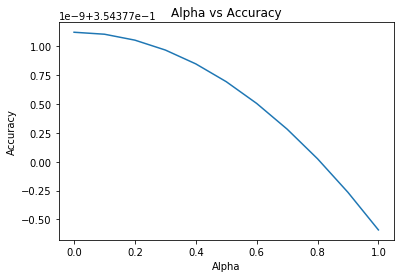

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


from sklearn.linear_model import Ridge
Accuracy=[]
Alpha=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

model = LinearRegression(normalize=True)

for i in range(0,110,10):

    model = Ridge(alpha=0.01*i)            # applied regularization(Ridge)
    model.fit(X_train, y_train)
    accuracy=model.score(X_train,y_train)
    print(accuracy)
    
    Accuracy.append(accuracy)


plt.ylabel('Accuracy')
plt.xlabel('Alpha')
plt.plot(Alpha,Accuracy)
plt.title("Alpha vs Accuracy")

We can observe from the graph that, accuracy is decreasing with the increase in alpha value

# Conclusion

## Linear regression

1. By observing all the three models, we can conclude that the relationship of the target variable with the features mentioned is significant. 
2. The significant features are as below: population, gdp-per_capita, gdp_per_year, year, sex 
3. The results show that the model 1 has comparatively better accuracy than model 2 and 3
4. All three model makes sense
5. For all three models cross validation gives good result, such that it is accurate


## Logistic regression

1. By observing all the three models, we can conclude that the relationship of the target variable with the features mentioned is significant.
2. The significant features are as below: population, gdp-per_capita, gdp_per_year, year, sex
3. The results show that the model 1 has comparatively better accuracy than model 2 and 3
4. The probability of the dependent variable is calculated in all three models


## Multi-colinearity

Is there any multi-colinearity in the model?

Yes, the model which is being considered, has multi-colinearity

In the multiple regression models are predictor variables independent of all the other predictor variables?

No, the predictor variables are not independent of all the other predictor variables

In multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.
1. Rank1: 'sex', 'age','population','suicidesper100kpop','gdp_for_year_dollars', 'gdp_per_capita_dollars'
2. Rank2: 'sex', 'age','population','gdp_per_capita_dollars'
3. Rank3: ''population','sex'

## Interaction effect

1. From the interaction effect performed on model 1 (by considering population suicides_no), we can conclude that there was a major effect of the product term,i.e. there is significant synergy observed as the accuracy of the model with product term being involved is huge
2. From the interaction effect performed on model 2(by considering population and gdp_per_capita), we can conclude that there was no major effect of the product term,i.e. there is no significant synergy observed as the accuracy of the model with and without product term being involved is 38%

## Regularization

It can be observed from the graph that, accuracy is decreasing with the increase in alpha value

# Contribution

1. The Dataset had many unknown values , cleaning of data was done by me.
2. Initial EDA was performed on the dataset so that the dataset is clean before performing any regression.
3. Linear and Logistic regression was performed and the code was referenced from the Kernel of the Kaggle website.
4. Performed multi-colinearity on the linear model, cross-validated all the models
5. The interaction effect was calculated and the result was compared with the original model with product term
6. Significance of the independent variables was calculated on the dependent variable
7. Ridge Regularization was performed on the model.
8. 70% of code from online resources
9. 30% of code by me

# Citation

1. https://www.kaggle.com/scsaurabh/suicide-rates-stats-economics-demographics
2. Kaggle: https://www.kaggle.com/
3. Wikipedia: https://en.wikipedia.org/
4. Towards Data Science: https://towardsdatascience.com/
5. Github: https://github.com/nikbearbrown/INFO_6105
6. Datacamp: https://datacamp.com

# License

Copyright 2019 Vinay Ramesh Kangokar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.